In [1]:
#pacotes necessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
plt.style.use('fivethirtyeight')
plt.rcParams['text.color'] = 'black'

#### Dicionário de Variáveis utilizadas
|Chave|Descrição|Função|
|-----|-----|-----|
|**Identificação**|
|Ano| Ano de referência|Controle|
|Trimestre| Trimestre de referência|Controle|
|UF| Estado|Controle|
|Capital| Capital da UF|Controle|
|UPA| Unidade Primária de Amostragem (UF(2) + número squencial(6) + DV(1))|Controle|
|V1008| Número do Domicílio|Controle|
|V1014| Painel - Grupo de Controle|Controle|
|V1016| Número de entrevista (1 a 5)|Controle|
|V2003| Número de ordem|Controle|
|**Características**|
|V2007| Sexo|Característica|
|V2008| Dia Nascimento|Característica|
|V20081| Mês nascimento|Característica|
|V20082| Ano nascimento|Característica|
|V2010| Raça|Característica|
|**Variáveis exploradas**|
| VD4001 | Condição em relação à força de trabalho na semana de referência para pessoas de 14 anos ou mais de idade | Descrição |
| VD4002 | Condição de ocupação na semana de referência para pessoas de 14 anos ou mais de idade | Descrição |
| VD4003 | Força de trabalho potencial para pessoas de 14 anos ou mais de idade | Descrição |
| VD4004A | Subocupação por insuficiência de horas efetivamente trabalhadas em todos os trabalhos | Descrição |
| VD4005 | Pessoas desalentadas na semana de referência | Descrição |
|**Auxiliares**|
|V1028| Peso do domicílio e das pessoas sem calibração|Expansão|
|V1029| Peso do domicílio e das pessoas com calibração|Expansão|
|V1033| Projeção da população por sexo e idade|Expansão|
|posest|Domínios de projeção geográficos|Expansão|

 Chave para pessoa: UPA + V1008 + V1014  + V2003 + V2007 + V2008 + V20081 + V20082

 **PARA ESTIMAÇÃO DA POPULAÇÃO, DEVE-SE USAR AS VARIÁVEIS: V1033 e posest.**



Importação das bases

In [2]:
#determina qual diretório usar para cada sistema operacional.
import os
if os.name == 'nt': #windows
    diretorio = 'C:\\Users\\est.matheus.brasil\\Documents\\Microdados PNAD Contínua\\feather\\'

else: #linux(ou mac)
    diretorio = '/home/matheus/Microdados PNAD/feather/'

#Leitura de todas as bases com as variáveis selecionadas e criação de variáveis dinamicamente.

colunas_selecionadas = ['Ano', 'Trimestre', 'UPA', 'UF', 'V1008', 'V1014', 'V2007', 'V2008', 'V20081', 'V20082', 'V2010', #Controle e chave ID
                        'V1016', 'VD4001','VD4002', 'VD4003','VD4004A','VD4005', #Variáveis de interesse
                        'V1027', 'V1028', 'V1029', 'V1033', 'posest', 'posest_sxi'] #expansão
                    
for ano in range(2019, 2023):
    for tri in range(1, 5):
        if ano == 2019  and tri > 3:
                print(f'lendo PNAD{ano} {tri}')
                globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}.feather', columns=colunas_selecionadas)
        if 2019 < ano < 2022:
                print(f'lendo PNAD{ano} {tri}')
                globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}.feather', columns=colunas_selecionadas)
        if ano == 2022 and tri < 3:
            print(f'lendo PNAD{ano} {tri}')
            globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}.feather', columns=colunas_selecionadas)

lendo PNAD2019 4
lendo PNAD2020 1
lendo PNAD2020 2
lendo PNAD2020 3
lendo PNAD2020 4
lendo PNAD2021 1
lendo PNAD2021 2
lendo PNAD2021 3
lendo PNAD2021 4
lendo PNAD2022 1
lendo PNAD2022 2


Tratamento dos dados

In [3]:
pnadc_completa = pd.concat([pnad_2019_4, 
                            pnad_2020_1, 
                            pnad_2020_2, 
                            pnad_2020_3, 
                            pnad_2020_4, 
                            pnad_2021_1, 
                            pnad_2021_2, 
                            pnad_2021_3, 
                            pnad_2021_4, 
                            pnad_2022_1, 
                            pnad_2022_2])

In [4]:
pnadc_completa = pnadc_completa[(pnadc_completa['V2008'] != 99)&(pnadc_completa['V20081'] != 99)&(pnadc_completa['V20082'] != 9999)]

In [5]:
#Concatena todos os dataframes de cada ano e trimestre em uma unica tabela.

# pnadc_completa = pd.concat([pnad_2019_4, 
#                             pnad_2020_1, 
#                             pnad_2020_2, 
#                             pnad_2020_3, 
#                             pnad_2020_4, 
#                             pnad_2021_1, 
#                             pnad_2021_2, 
#                             pnad_2021_3, 
#                             pnad_2021_4, 
#                             pnad_2022_1, 
#                             pnad_2022_2])
#Converte variável para criar ID
pnadc_completa['V2007'] = np.where(pnadc_completa['V2007'] == 'Homem', 0, 1)
#Converte variáveis para numéricas
pnadc_completa['UPA'] = pd.to_numeric(pnadc_completa['UPA'] , errors='coerce')
pnadc_completa['V1008'] = pd.to_numeric(pnadc_completa['V1008'] , errors='coerce')
pnadc_completa['V1014'] = pd.to_numeric(pnadc_completa['V1014'] , errors='coerce')
pnadc_completa['V2007'] = pd.to_numeric(pnadc_completa['V2007'] , errors='coerce')
pnadc_completa['V2008'] = pd.to_numeric(pnadc_completa['V2008'] , errors='coerce')
pnadc_completa['V20081'] = pd.to_numeric(pnadc_completa['V20081'] , errors='coerce')
pnadc_completa['V20082'] = pd.to_numeric(pnadc_completa['V20082'] , errors='coerce')

#Cria chave ID e novo df
pnadc_completa = pd.DataFrame({
    #Controle
    'Ano':pnadc_completa['Ano'], 
    'Trimestre':pnadc_completa['Trimestre'],
    'UPA':pnadc_completa['UPA'],
    'UF':pnadc_completa['UF'],
    'V2007':pnadc_completa['V2007'],
    #ID  
    'ID': pnadc_completa['UPA'].map(str) + 
        pnadc_completa['V1008'].map(str) + 
        pnadc_completa['V1014'].map(str) + 
        pnadc_completa['V2007'].map(str) +
        pnadc_completa['V2008'].map(str) +
        pnadc_completa['V20081'].map(str) +
        pnadc_completa['V20082'].map(str),
    #Exploradas
    'V2010': pnadc_completa['V2010'],
    'VD4001': pnadc_completa['VD4001'],
    'VD4002': pnadc_completa['VD4002'],
    'VD4003': pnadc_completa['VD4003'],
    'VD4004A': pnadc_completa['VD4004A'],
    'VD4005': pnadc_completa['VD4005'],
    'V1016': pnadc_completa['V1016'],
    #Expansão
    'V1027': pnadc_completa['V1027'],
    'V1028': pnadc_completa['V1028'],
    'V1029': pnadc_completa['V1029'],
    'V1033': pnadc_completa['V1033'],
    'posest': pnadc_completa['posest'],
    'posest_sxi': pnadc_completa['posest_sxi']
    })

pnadc_completa['ID'] = pnadc_completa['ID'].map(int)

#Reverte alteração da coluna V2007 para os rótulos anteiores
pnadc_completa['V2007'] = pnadc_completa['V2007'].apply(lambda x: 'Homem' if x == 0 else 'Mulher')
# Ordernação da série histórica por ano e trimestre.
pnadc_completa.sort_values(by=['Ano', 'Trimestre'], inplace=True)
#concatena a coluna 'Ano' e 'Trimestre' em uma única coluna.
pnadc_completa['ano_tri'] = pnadc_completa['Ano'].astype(str) + 'Q' + pnadc_completa['Trimestre'].astype(str)
#Conversão da coluna ano_tri para datetime.
pnadc_completa['ano_tri'] = pd.to_datetime(pnadc_completa['ano_tri']).dt.to_period('Q')

In [6]:
#1º Filtrada
ids_lista = pnadc_completa['ID'].value_counts()
ids_lista = ids_lista[pnadc_completa['ID'].value_counts() > 1].index

pnadc_filtrada = pnadc_completa[pnadc_completa['ID'].isin(ids_lista)].drop_duplicates(subset=['ID', 'ano_tri'])

#2º Filtrada
ids_lista = pnadc_filtrada['ID'].value_counts()
ids_lista = ids_lista[pnadc_filtrada['ID'].value_counts() > 1].index

pnadc_filtrada = pnadc_filtrada[pnadc_filtrada['ID'].isin(ids_lista)]

In [7]:
ids_lista_entrevistas_5 = pd.DataFrame(pnadc_filtrada['ID'].value_counts())
ids_lista_entrevistas_5 = ids_lista_entrevistas_5[ids_lista_entrevistas_5['ID'] == 5].index

In [8]:
pnadc_filtrada = pnadc_filtrada[pnadc_filtrada['ID'].isin(ids_lista_entrevistas_5)].sort_values(by=['ID','V1016','ano_tri'])

In [9]:
pd.crosstab(pnadc_filtrada['ano_tri'], pnadc_filtrada['posest'], pnadc_filtrada['V1033'], aggfunc='sum').sum(axis=1)

ano_tri
2019Q4     379541640958
2020Q1     687486059672
2020Q2     859904458923
2020Q3    1088574943180
2020Q4    1285057059537
2021Q1    1105413859271
2021Q2    1046560265429
2021Q3     873784850787
2021Q4     645059639678
2022Q1     447583766382
2022Q2     248231388136
Freq: Q-DEC, dtype: int64

### Características das pessoas que passaram por mudança de ocupação

In [10]:
#TODO: Desenvolver visualização que mostre a mudança individual ao longo do tempo para a variável de ocupação (VD4002) e, posteriormente, local de trabalho

In [19]:
#filtrar pnadc_completa para mostrar somente os individuos no ano_tri 2019Q4 e 2020Q1
pnadc_completa_2019Q4_2020Q1 = pnadc_completa[(pnadc_completa['ano_tri'] < '2020Q2')]

In [26]:
ids_em_2tri = pd.DataFrame({'tri':pnadc_completa_2019Q4_2020Q1.groupby(['ID'])['ano_tri'].count()})

In [30]:
pnadc_completa_2019Q4_2020Q1_filtrado = pnadc_completa_2019Q4_2020Q1[pnadc_completa_2019Q4_2020Q1['ID'].isin(ids_em_2tri[ids_em_2tri['tri'] == 2].index)]

In [32]:
pnadc_completa_2019Q4_2020Q1_filtrado.groupby(['ano_tri'])['ID'].count()

ano_tri
2019Q4    348727
2020Q1    348541
Freq: Q-DEC, Name: ID, dtype: int64

In [34]:
pnadc_completa_2019Q4_2020Q1_filtrado.head(2)

,Ano,Trimestre,UPA,UF,V2007,ID,V2010,VD4001,VD4002,VD4003,VD4004A,VD4005,V1016,V1027,V1028,V1029,V1033,posest,posest_sxi,ano_tri
0,2019,4,110000016,Rondônia,Mulher,110000016171221974,Parda,Pessoas na força de trabalho,Pessoas ocupadas,None,Pessoas subocupadas,None,4,98.756636,145.62879,532471,6982307,111,210,2019Q4
1,2019,4,110000016,Rondônia,Mulher,1100000161711521992,Parda,Pessoas fora da força de trabalho,None,Pessoas fora da força de trabalho e fora da fo...,None,None,4,98.756636,145.62879,532471,8485527,111,206,2019Q4


<AxesSubplot:ylabel='ano_tri,V2010'>

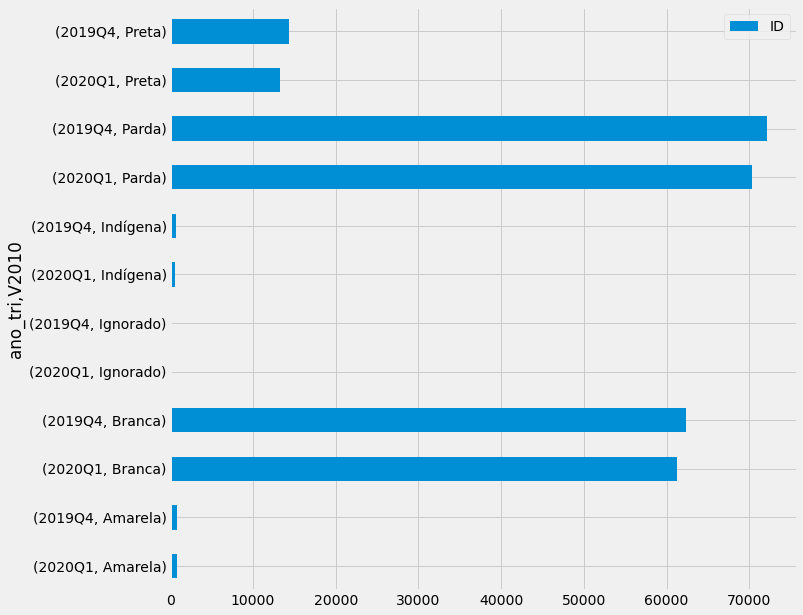

In [79]:
pnadc_completa_2019Q4_2020Q1_filtrado[pnadc_completa_2019Q4_2020Q1_filtrado['VD4002']=='Pessoas ocupadas'].groupby(['ano_tri','V2010'])[['ID']].count().sort_values(by=['V2010','ano_tri'], ascending=[True,False]).plot(kind='barh', figsize=(10,10))

<AxesSubplot:ylabel='ano_tri,V2010'>

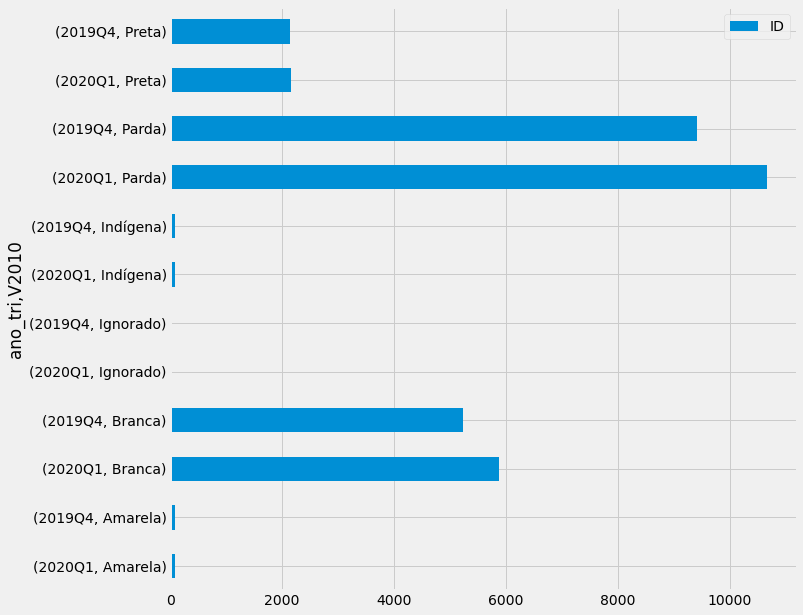

In [80]:
pnadc_completa_2019Q4_2020Q1_filtrado[pnadc_completa_2019Q4_2020Q1_filtrado['VD4002']=='Pessoas desocupadas'].groupby(['ano_tri','V2010'])[['ID']].count().sort_values(by=['V2010','ano_tri'], ascending=[True,False]).plot(kind='barh', figsize=(10,10))

Expansão da amostra: pessoas identificadas por ID que estão presente no 4T2019 e 1T2020, desagregado por situação de ocupação e etnia.

In [89]:
pd.crosstab(pnadc_completa_2019Q4_2020Q1_filtrado['ano_tri'], [pnadc_completa_2019Q4_2020Q1_filtrado['VD4002'], pnadc_completa_2019Q4_2020Q1_filtrado['V2010'],  pnadc_completa_2019Q4_2020Q1_filtrado['V2007']], pnadc_completa_2019Q4_2020Q1_filtrado['V1028'], aggfunc='sum').T / 1000

ano_tri                                    2019Q4        2020Q1
VD4002              V2010    V2007                             
Pessoas desocupadas Amarela  Homem      20.511527     22.270179
                             Mulher     23.302553     24.473805
                    Branca   Homem    1189.258165   1512.442496
                             Mulher   1412.050035   1725.241238
                    Ignorado Homem       0.857295           NaN
                             Mulher      0.908751      2.035487
                    Indígena Homem      11.511644     12.367933
                             Mulher     15.125432     13.626508
                    Parda    Homem    1804.296659   2270.873537
                             Mulher   2089.607649   2473.516132
                    Preta    Homem     438.586030    471.841423
                             Mulher    570.046382    640.675331
Pessoas ocupadas    Amarela  Homem     249.122817    267.619662
                             Mulher    215.701414    203.603153
                    Branca   Homem   15454.091630  16427.954970
                             Mulher  12770.781195  13372.919557
                    Ignorado Homem       3.814313      7.362135
                             Mulher      3.012540      1.750052
                    Indígena Homem     139.424386    117.936429
                             Mulher     81.759702     88.097507
                    Parda    Homem   16160.252140  17240.569993
                             Mulher  11479.802352  12033.596252
                    Preta    Homem    3704.409906   3760.069549
                             Mulher   2699.638423   2747.606338

In [97]:
#Selecionar apenas os individuos que a situação de ocupação é diferente entre os trimestres
pnadc_2019Q4_filtrado = pnadc_completa_2019Q4_2020Q1_filtrado[pnadc_completa_2019Q4_2020Q1_filtrado['ano_tri'] == '2019Q4']
pnadc_2020Q1_filtrado = pnadc_completa_2019Q4_2020Q1_filtrado[pnadc_completa_2019Q4_2020Q1_filtrado['ano_tri'] == '2020Q1']

In [99]:
filtrados_join =  pnadc_2019Q4_filtrado.join(pnadc_2020Q1_filtrado.set_index('ID'), on='ID', lsuffix='_2019Q4', rsuffix='_2020Q1', how='inner')

In [102]:
filtrado_selecao = filtrados_join[['ID','VD4002_2019Q4','VD4002_2020Q1']]

In [103]:
filtrado_selecao['Comparativo'] = filtrado_selecao['VD4002_2019Q4'] == filtrado_selecao['VD4002_2020Q1']

C:\Users\est.matheus.brasil\AppData\Local\Temp\ipykernel_6984\3183252017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtrado_selecao['Comparativo'] = filtrado_selecao['VD4002_2019Q4'] == filtrado_selecao['VD4002_2020Q1']


In [117]:
filtrado_selecao[(filtrado_selecao['VD4002_2019Q4'] == 'Pessoas ocupadas') & (filtrado_selecao['VD4002_2020Q1'] != 'Pessoas ocupadas')]

,ID,VD4002_2019Q4,VD4002_2020Q1,Comparativo
28,110000016970681986,Pessoas ocupadas,Pessoas desocupadas,False
29,11000001697010111997,Pessoas ocupadas,None,False
31,11000001610701861976,Pessoas ocupadas,None,False
53,1100000343812361993,Pessoas ocupadas,None,False
83,1100005841801231990,Pessoas ocupadas,Pessoas desocupadas,False
...,...,...,...,...
542533,53002980010706101998,Pessoas ocupadas,None,False
542538,530037924180111987,Pessoas ocupadas,Pessoas desocupadas,False
542578,53003792414802491989,Pessoas ocupadas,Pessoas desocupadas,False
542660,53004004214812941983,Pessoas ocupadas,None,False


In [119]:
lista_id_mudanca = filtrado_selecao[(filtrado_selecao['VD4002_2019Q4'] == 'Pessoas ocupadas') & (filtrado_selecao['VD4002_2020Q1'] != 'Pessoas ocupadas')]['ID'].to_list()

In [127]:
pnadc_identificados = pnadc_completa[(pnadc_completa['ID'].isin(lista_id_mudanca)) & (pnadc_completa['ano_tri']=='2020Q1')].drop_duplicates('ID')

In [168]:
resultado_identificacao = pd.crosstab(pnadc_identificados['UF'], [pnadc_identificados['V2007'], pnadc_identificados['V2010']], pnadc_identificados['V1028'], aggfunc='sum')

O resultado encontrado é uma estimativa das características de localização, sexo e etnia das pessoas que estavam ocupadas e não se encontram mais nessa situação entre o período de 4T19 e 1T20.

Entende-se que que o grupo composto de mulheres pardas representam o maior número de pessoas que ficaram desempregadas (ou outra situação) de um trimestre para outro. Logo em seguida veio o grupo de homens pardos, e mulheres brancas.

No geral, as mulheres foram o grupo com o mais indivíduos que saíram da situação de ocupadas de 2019 para 2020.

In [151]:
resultado_identificacao.sum(axis=0) / 1000

V2007   V2010   
Homem   Amarela       23.896771
        Branca      1214.834770
        Ignorado       0.409385
        Indígena      17.412209
        Parda       1946.005120
        Preta        385.239801
Mulher  Amarela       26.158974
        Branca      1457.578166
        Ignorado       0.823057
        Indígena      14.608150
        Parda       1983.771384
        Preta        420.741125
dtype: float64

In [165]:
resultado_identificacao['Homem'].sum(axis=1)

Ano
2020    3.587798e+06
dtype: float64

In [166]:
resultado_identificacao['Mulher'].sum(axis=1)

Ano
2020    3.903681e+06
dtype: float64

In [ ]:
#TODO: confirmar informação abaixo:
#Entre as UF's que mais perderam ocupados, a maioria são do Nordeste e Norte. A maioria dos ocupados que perderam o emprego eram homens, com idade entre 25 e 34 anos, com ensino médio completo e que trabalhavam na área de serviços. (?)

entre as UF que perderam mais pessoas ocupadas, São Paulo concentra o maior número, seguido por Minas Gerais e Bahia.

In [172]:
resultado_identificacao.sum(axis=1).sort_values(ascending=False)

UF
São Paulo              1.419676e+06
Minas Gerais           8.082498e+05
Bahia                  6.666458e+05
Rio de Janeiro         5.194357e+05
Ceará                  4.150143e+05
Paraná                 3.574926e+05
Maranhão               3.566655e+05
Rio Grande do Sul      3.545708e+05
Pará                   3.315567e+05
Pernambuco             2.575217e+05
Goiás                  2.411214e+05
Santa Catarina         2.306495e+05
Piauí                  1.934640e+05
Amazonas               1.695386e+05
Paraíba                1.647827e+05
Rio Grande do Norte    1.457705e+05
Espírito Santo         1.340872e+05
Mato Grosso            1.165142e+05
Alagoas                1.086622e+05
Sergipe                1.071431e+05
Mato Grosso do Sul     1.020875e+05
Distrito Federal       7.528230e+04
Tocantins              6.979433e+04
Rondônia               6.070550e+04
Acre                   3.724928e+04
Amapá                  2.494868e+04
Roraima                2.284840e+04
dtype: float64

In [56]:
# calcular o tamanho da amostra
sample_size = len(pnad_2022_1)

# calcular a proporção da população para cada categoria de interesse
population_proportions["Total"] = pnad_2022_1.groupby("Ano").sum()["V1028"] / pnad_2022_1["V1028"].sum()

# calcular o tamanho da população total usando o tamanho da amostra e as proporções da população
population_size = pnad_2022_1["V1028"].sum() / population_proportions["Total"]

# imprimir o tamanho da população estimado
print("Tamanho da população estimado: ", population_size)

Tamanho da população estimado:  ano_tri  V2010   
2019Q4   Amarela     9.036751e+10
         Branca      1.398033e+09
         Ignorado    4.002710e+12
         Indígena    1.770828e+11
         Parda       1.275901e+09
         Preta       6.401894e+09
2020Q1   Amarela     8.460609e+10
         Branca      1.291800e+09
         Ignorado    4.064858e+12
         Indígena    1.739454e+11
         Parda       1.161023e+09
         Preta       6.065466e+09
Name: V1028, dtype: float64


In [ ]:
pnadc_filtrada.groupby("ano_tri").sum()["V1028"]

ano_tri
2019Q4    2.257848e+07
2020Q1    4.648891e+07
2020Q2    7.529111e+07
2020Q3    9.134497e+07
2020Q4    1.126427e+08
2021Q1    1.020547e+08
2021Q2    8.784855e+07
2021Q3    6.146946e+07
2021Q4    4.276077e+07
2022Q1    2.851745e+07
2022Q2    1.583837e+07
Freq: Q-DEC, Name: V1028, dtype: float64